In [1]:
import boto3
import os
from dotenv import load_dotenv
load_dotenv()
s3client=boto3.client(
    's3',
    aws_access_key_id = os.getenv('MY_ACCESS_KEY'),
    aws_secret_access_key = os.getenv('MY_SECRET_KEY')

)
buckets=s3client.list_buckets()


In [2]:
buckets

{'ResponseMetadata': {'RequestId': '9A40J88B3G1BA8WS',
  'HostId': 'AUS9UVLQk/qwyc8iUmJ38lmG9ZDjARlcDlDs1mt94WdOVej9Uhky3QXpmFiwSzMdTRG9WCsPeGs=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'AUS9UVLQk/qwyc8iUmJ38lmG9ZDjARlcDlDs1mt94WdOVej9Uhky3QXpmFiwSzMdTRG9WCsPeGs=',
   'x-amz-request-id': '9A40J88B3G1BA8WS',
   'date': 'Wed, 05 Feb 2025 08:44:49 GMT',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Buckets': [{'Name': 'restaurantdatas',
   'CreationDate': datetime.datetime(2025, 2, 5, 5, 49, 39, tzinfo=tzutc())}],
 'Owner': {'DisplayName': 'hariviper712',
  'ID': 'ec5435e20ef59cb6a8ba6969529a1e6b80623902345b57085a4fca56f0ae0bca'}}

In [3]:
files_inside_folder=s3client.list_objects_v2(Bucket='restaurantdatas')
files_inside_folder

{'ResponseMetadata': {'RequestId': 'FG4HTH5DQN7WT7WK',
  'HostId': '9Jt0u6cc2j3oYeugLZibLj8fww0ov6JPlXPCoFxYGqlFP+CwaWxNvWutCX2Meu0vhmpp6BccLALOjwgLyDcmmw==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '9Jt0u6cc2j3oYeugLZibLj8fww0ov6JPlXPCoFxYGqlFP+CwaWxNvWutCX2Meu0vhmpp6BccLALOjwgLyDcmmw==',
   'x-amz-request-id': 'FG4HTH5DQN7WT7WK',
   'date': 'Wed, 05 Feb 2025 08:45:43 GMT',
   'x-amz-bucket-region': 'ap-south-1',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'IsTruncated': False,
 'Contents': [{'Key': 'zomato dataset/file1.json',
   'LastModified': datetime.datetime(2025, 2, 5, 5, 52, 4, tzinfo=tzutc()),
   'ETag': '"1836d48625fa4019d65b5f1e80d01ee0"',
   'ChecksumAlgorithm': ['CRC64NVME'],
   'ChecksumType': 'FULL_OBJECT',
   'Size': 2198732,
   'StorageClass': 'STANDARD'},
  {'Key': 'zomato dataset/file2.json',
   'LastModified': datetime.datetime(2025, 2, 5, 5, 51, 55, tzinfo=tzutc()),
   

In [9]:
s3client.download_file('restaurantdatas','zomato dataset/file6.json','file(6).json')

ClientError: An error occurred (404) when calling the HeadObject operation: Not Found

In [26]:
import pandas as pd
import json
with open("file(5).json",'r')as file:
    data=json.load(file)

In [27]:
restaurants=data[0]['restaurants']
restaurants

[]

In [30]:
flattened_data=[]
for i in range(len(data)):
    keys=data[i].keys()
    if 'restaurants' in keys:
        restaurants=data[i]['restaurants']
        for item in restaurants:
            restaurant=item['restaurant']
            flattened_data.append({
                "Restaurant ID":restaurant.get("R",{}).get("res_id"),
                'Name':restaurant.get("name"),
                'Location':restaurant["location"].get("address"),
                'City':restaurant['location'].get("city"),
                'Cuisines':restaurant.get("cuisines"),
                'Rating':restaurant["user_rating"].get("aggregate_rating"),
                'Average_cost_for_two':restaurant.get("average_cost_for_two"),
                'Price Range':restaurant.get("price_range"),
                'feature-Table_Booking':restaurant.get("has_table_booking"),
                'feature-Online_delivery':restaurant.get("has_online_delivery"),
                'longitude':restaurant["location"].get("longitude"),
                'latitude':restaurant["location"].get("latitude"),
            })

In [31]:
len(flattened_data)

420

In [5]:
df1=pd.DataFrame(flattened_data)
df1

,Restaurant ID,Name,Location,City,Cuisines,Rating,Average_cost_for_two,Price Range,feature-Table_Booking,feature-Online_delivery,longitude,latitude
0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi",New Delhi,"Continental, American, Asian, North Indian",4.3,1600,3,1,1,77.1944706000,28.5542851000
1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,"Thai, European, Mexican, North Indian, Chinese...",4.5,1500,3,1,0,77.1177015000,28.6471325000
2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,"Cafe, Italian, Continental, Chinese",4.4,850,2,0,1,77.2043172000,28.6949468000
3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,"Italian, Continental",4.1,1850,3,1,0,77.2038090000,28.5525204000
4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,"North Indian, Italian, Asian, American",4.4,1600,3,1,0,77.2228584811,28.6330248887
...,...,...,...,...,...,...,...,...,...,...,...,...
1175,7602340,The Boozy Cow,"17 Frederick Street, New Town, Edinburgh EH2 2EY",Edinburgh,"Burger, Grill",4.0,40,3,0,0,-3.1995690000,55.9519740000
1176,7600217,La Favorita,"325-331 Leith Walk, Leith, Edinburgh EH6 8SA",Edinburgh,Italian,4.5,30,3,0,0,-3.1768583333,55.9646694444
1177,7601577,Roseleaf Bar Cafe,"23-24 Sandport Place, Leith, Edinburgh EH6 6EW",Edinburgh,"Scottish, Cafe",4.7,45,3,0,0,-3.1736790000,55.9766440000
1178,7602224,Civerinos,"5 Hunter Square, Royal Mile, Old Town, Edinbur...",Edinburgh,"Pizza, Italian",3.7,35,3,0,0,-3.1879620000,55.9496370000


In [12]:
df2=pd.DataFrame(flattened_data)
df2

,Restaurant ID,Name,Location,City,Cuisines,Rating,Average_cost_for_two,Price Range,feature-Table_Booking,feature-Online_delivery,longitude,latitude
0,16668008,Arigato Sushi,"14 Second Ave North, Yorkton, SK S3N 1G1",Yorkton,Asian,3.3,25,2,0,0,-102.4613173000,51.2106824000
1,801690,Mocha,"CP-1, 2nd Floor, Anand Plaza, Viram Khand-1, N...",Lucknow,"Cafe, Italian, Continental",4.6,800,3,0,0,81.0011849000,26.8528099000
2,17558738,Blue House Cafe,"919 Bridge St, Vernonia, OR 97064",Vernonia,"Coffee and Tea, Mediterranean",4.3,10,1,0,0,-123.1954368000,45.8586670000
3,16611701,Star Buffet,"58 Hanbury St, Mayfield, NSW",Mayfield,Asian,2.9,20,2,0,0,151.7343832000,-32.8991780000
4,2100784,11th Avenue Cafe Bistro,"Opposite Assam State Museum, Dighalipukhuri, T...",Guwahati,"Cafe, American, Italian, Continental",4.1,400,2,0,0,91.7523143068,26.1860014826
...,...,...,...,...,...,...,...,...,...,...,...,...
10597,18289242,Cyber Hub Social,"Cyber Hub, DLF Cyber City, Gurgaon",Gurgaon,"Continental, American, Asian, North Indian",4.3,1500,3,1,1,77.0885080000,28.4939356000
10598,799,Gulati,"6, Pandara Road Market, New Delhi",New Delhi,"North Indian, Mughlai",4.4,1500,3,0,1,77.2297330000,28.6081402000
10599,301998,Punjab Grill,"Pacific Mall, Tagore Garden, New Delhi",New Delhi,North Indian,4.3,1600,3,1,1,77.1065034000,28.6422159000
10600,307113,Diggin,"Anand Lok Shopping Centre, Opposite Gargi Coll...",New Delhi,"Italian, Continental, Cafe",4.2,1400,3,1,1,77.2194983000,28.5556355000


In [19]:
df3=pd.DataFrame(flattened_data)
df3

,Restaurant ID,Name,Location,City,Cuisines,Rating,Average_cost_for_two,Price Range,feature-Table_Booking,feature-Online_delivery,longitude,latitude
0,2100702,Barbeque Nation,"2nd Floor, Adityam Building, Ulubari, Guwahati",Guwahati,North Indian,4.9,1500,4,0,0,91.7598570000,26.1721190000
1,16608059,1918 Bistro & Grill,"94 Murray St, Tanunda, SA",Tanunda,"Modern Australian, Australian",4.4,30,3,0,0,138.9660640000,-34.5196190000
2,17558684,Berry Patch Restaurant,"49289 Us-30, Westport, OR 97016",Clatskanie,"American, Breakfast, Desserts",4.3,10,1,0,0,-123.3681510000,46.1269670000
3,16604896,La Trattoria of Lavandula,"350 Hepburn-Newstead Road, Hepburn Springs, VIC",Hepburn Springs,"Italian, Fusion, Cafe",3.8,7,1,0,0,144.1100620000,-37.2754940000
4,17536645,Jehova es Mi Pastor Tacos y Burritos,"135 W. Main Street, Fernley, NV 89408",Fernley,Mexican,3.7,10,1,0,0,-119.2526940000,39.6075150000
...,...,...,...,...,...,...,...,...,...,...,...,...
8681,16512333,Britto's Bar & Restaurant,"Baga Calangute, Bardez, Baga, Goa",Goa,"North Indian, Continental, Chinese, Seafood",4.3,1400,4,0,0,73.7494780582,15.5612954890
8682,17559793,Fishpatrick's Crabby Cafe,"196 Bayfront Loop, Winchester Bay, OR 97467",Winchester Bay,"Burger, Seafood, Steak",3.2,25,2,0,0,-124.1753460000,43.6789980000
8683,16607969,Bespoke Harvest,"16 Grant St, Forrest, VIC",Forrest,"Cafe, Australian",3.7,20,2,0,0,143.7143150000,-38.5172920000
8684,17842104,Mr.,"23 Victoria St, Macedon, VIC",Macedon,Cafe,3.5,20,2,0,0,144.5641740000,-37.4231890000


In [25]:
df4=pd.DataFrame(flattened_data)
df4

,Restaurant ID,Name,Location,City,Cuisines,Rating,Average_cost_for_two,Price Range,feature-Table_Booking,feature-Online_delivery,longitude,latitude
0,16604370,Mad Cowes Cafe,"4/17 The Esplanade, Cowes, VIC",Phillip Island,"Breakfast, Coffee and Tea, Modern Australian",3.7,20,2,0,0,145.2378130000,-38.4483070000
1,16643459,Consort Restaurant,"4931 50th Street, Consort, AB T0C 1B0",Consort,"Chinese, Canadian",3.0,25,2,0,0,-110.7746994000,52.0082889000
2,18185059,Cafe Arabelle,"Ayala Mall, Solenad, Nuvali, Santa Rosa - Taga...",Santa Rosa,"Cafe, American, Italian, Filipino",3.6,800,3,0,0,121.0570400000,14.2370820000
3,18385186,The Cafe Baraco,"34, Shribhuvan Complex, Near Memnagar Fire Sta...",Ahmedabad,"Cafe, Italian",4.4,600,2,0,1,72.5504755000,23.0443367000
4,2200000,Kesar Da Dhabha,"Near Telephone Exchange, Chowk Passian, Shastr...",Amritsar,North Indian,4.1,500,2,0,0,74.8730050000,31.6243860000
...,...,...,...,...,...,...,...,...,...,...,...,...
8860,17557488,Burger Queen Drive In,"109 S F St, Lakeview, OR 97630",Lakeview,"Burger, Desserts, Sandwich",3.6,10,1,0,0,-120.3458000000,42.1885000000
8861,18182702,Nonna's Pasta & Pizzeria,"Ground Floor, Building G, Solenad 3, Nuvali, D...",Santa Rosa,"Italian, Pizza",4.0,850,3,0,0,121.0565873981,14.2376789732
8862,16608864,Taste of Balingup,"63 South Western Hwy, Balingup, WA",Balingup,Modern Australian,3.2,20,2,0,0,115.9844924000,-33.7845269000
8863,13231,Le Plaisir,"759/125, Rajkamal, Opposite Kelkar Eye Hospita...",Pune,"European, Desserts",4.8,1000,3,0,0,73.8384293765,18.5142099831


In [32]:
df5=pd.DataFrame(flattened_data)
df5

,Restaurant ID,Name,Location,City,Cuisines,Rating,Average_cost_for_two,Price Range,feature-Table_Booking,feature-Online_delivery,longitude,latitude
0,17066603,The Coop,"610 W Morse Boulevard, Winter Park, FL 32789",Orlando,"Southern, Cajun, Soul Food",3.6,25,2,0,0,-81.3572190000,28.5973660000
1,17059541,Maggiano's Little Italy,"9101 International Drive,Orlando, FL 32819",Orlando,Italian,4.4,50,4,0,0,-81.4714470000,28.4332350000
2,17064405,Tako Cheena by Pom Pom,"932 North Mills Avenue, Orlando, FL 32803",Orlando,"Asian, Latin American, Vegetarian",4.4,10,1,0,0,-81.3645470000,28.5578450000
3,17057797,Bosphorous Turkish Cuisine,"108 S Park Ave, Winter Park, FL 32789",Orlando,"Mediterranean, Turkish",4.2,40,3,0,0,-81.3508344000,28.5976271000
4,17057591,Bahama Breeze Island Grille,"8849 International Drive, Orlando, FL 32819",Orlando,Caribbean,4.3,45,3,0,0,-81.4715260000,28.4370650000
...,...,...,...,...,...,...,...,...,...,...,...,...
415,17582627,Senor Iguanas,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,Mexican,3.6,0,1,0,0,-112.4433000000,42.8942000000
416,17582625,Sandpiper Restaurant & Lounge,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,"American, Seafood, Steak",3.6,40,3,0,0,-112.4320000000,42.9012000000
417,17582668,Texas Roadhouse,"560 Bullock Street, Pocatello, ID 83202",Pocatello,"American, BBQ, Steak",3.5,45,3,0,0,-112.4613260000,42.9105180000
418,17582498,Riverwalk Cafe,"695 E Main St, Lava Hot Springs, ID 83246",Pocatello,"Asian, Thai",3.6,10,1,0,0,-112.0132000000,42.6200000000


In [33]:
joined_df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
joined_df

,Restaurant ID,Name,Location,City,Cuisines,Rating,Average_cost_for_two,Price Range,feature-Table_Booking,feature-Online_delivery,longitude,latitude
0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi",New Delhi,"Continental, American, Asian, North Indian",4.3,1600,3,1,1,77.1944706000,28.5542851000
1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,"Thai, European, Mexican, North Indian, Chinese...",4.5,1500,3,1,0,77.1177015000,28.6471325000
2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,"Cafe, Italian, Continental, Chinese",4.4,850,2,0,1,77.2043172000,28.6949468000
3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,"Italian, Continental",4.1,1850,3,1,0,77.2038090000,28.5525204000
4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,"North Indian, Italian, Asian, American",4.4,1600,3,1,0,77.2228584811,28.6330248887
...,...,...,...,...,...,...,...,...,...,...,...,...
29748,17582627,Senor Iguanas,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,Mexican,3.6,0,1,0,0,-112.4433000000,42.8942000000
29749,17582625,Sandpiper Restaurant & Lounge,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,"American, Seafood, Steak",3.6,40,3,0,0,-112.4320000000,42.9012000000
29750,17582668,Texas Roadhouse,"560 Bullock Street, Pocatello, ID 83202",Pocatello,"American, BBQ, Steak",3.5,45,3,0,0,-112.4613260000,42.9105180000
29751,17582498,Riverwalk Cafe,"695 E Main St, Lava Hot Springs, ID 83246",Pocatello,"Asian, Thai",3.6,10,1,0,0,-112.0132000000,42.6200000000


In [34]:
joined_df.value_counts

<bound method DataFrame.value_counts of        Restaurant ID                           Name  \
0             308322               Hauz Khas Social   
1           18037817     Qubitos - The Terrace Cafe   
2             312345                The Hudson Cafe   
3             307490              Summer House Cafe   
4           18241537                    38 Barracks   
...              ...                            ...   
29748       17582627                  Senor Iguanas   
29749       17582625  Sandpiper Restaurant & Lounge   
29750       17582668                Texas Roadhouse   
29751       17582498                 Riverwalk Cafe   
29752       17582499                    Royal Hotel   

                                                Location       City  \
0                 9-A & 12, Hauz Khas Village, New Delhi  New Delhi   
1      C-7, Vishal Enclave, Opposite Metro Pillar 417...  New Delhi   
2      2524, 1st Floor, Hudson Lane, Delhi University...  New Delhi   
3      1st Floo

In [35]:
joined_df.dtypes

Restaurant ID               int64
Name                       object
Location                   object
City                       object
Cuisines                   object
Rating                     object
Average_cost_for_two        int64
Price Range                 int64
feature-Table_Booking       int64
feature-Online_delivery     int64
longitude                  object
latitude                   object
dtype: object

In [37]:
null_count = joined_df['Cuisines'].isnull().sum()
null_count

np.int64(0)

In [39]:
joined_df.to_csv('zomato3.csv',index=False)

In [1]:
import pandas as pd
df=pd.read_csv('zomato3.csv')
df

,Restaurant ID,Name,Location,City,Cuisines,Rating,Average_cost_for_two,Price Range,feature-Table_Booking,feature-Online_delivery,longitude,latitude
0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi",New Delhi,"Continental, American, Asian, North Indian",4.3,1600,3,1,1,77.194471,28.554285
1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,"Thai, European, Mexican, North Indian, Chinese...",4.5,1500,3,1,0,77.117701,28.647133
2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,"Cafe, Italian, Continental, Chinese",4.4,850,2,0,1,77.204317,28.694947
3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,"Italian, Continental",4.1,1850,3,1,0,77.203809,28.552520
4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,"North Indian, Italian, Asian, American",4.4,1600,3,1,0,77.222858,28.633025
...,...,...,...,...,...,...,...,...,...,...,...,...
29748,17582627,Senor Iguanas,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,Mexican,3.6,0,1,0,0,-112.443300,42.894200
29749,17582625,Sandpiper Restaurant & Lounge,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,"American, Seafood, Steak",3.6,40,3,0,0,-112.432000,42.901200
29750,17582668,Texas Roadhouse,"560 Bullock Street, Pocatello, ID 83202",Pocatello,"American, BBQ, Steak",3.5,45,3,0,0,-112.461326,42.910518
29751,17582498,Riverwalk Cafe,"695 E Main St, Lava Hot Springs, ID 83246",Pocatello,"Asian, Thai",3.6,10,1,0,0,-112.013200,42.620000


In [3]:
df.dtypes

Restaurant ID                int64
Name                        object
Location                    object
City                        object
Cuisines                    object
Rating                     float64
Average_cost_for_two         int64
Price Range                  int64
feature-Table_Booking        int64
feature-Online_delivery      int64
longitude                  float64
latitude                   float64
dtype: object

In [4]:
null_values=df['Cuisines'].isna().sum()
null_values

np.int64(190)

In [5]:
df.dropna(how='any',subset=["Cuisines"],inplace=True)

In [6]:
df

,Restaurant ID,Name,Location,City,Cuisines,Rating,Average_cost_for_two,Price Range,feature-Table_Booking,feature-Online_delivery,longitude,latitude
0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi",New Delhi,"Continental, American, Asian, North Indian",4.3,1600,3,1,1,77.194471,28.554285
1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,"Thai, European, Mexican, North Indian, Chinese...",4.5,1500,3,1,0,77.117701,28.647133
2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,"Cafe, Italian, Continental, Chinese",4.4,850,2,0,1,77.204317,28.694947
3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,"Italian, Continental",4.1,1850,3,1,0,77.203809,28.552520
4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,"North Indian, Italian, Asian, American",4.4,1600,3,1,0,77.222858,28.633025
...,...,...,...,...,...,...,...,...,...,...,...,...
29748,17582627,Senor Iguanas,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,Mexican,3.6,0,1,0,0,-112.443300,42.894200
29749,17582625,Sandpiper Restaurant & Lounge,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,"American, Seafood, Steak",3.6,40,3,0,0,-112.432000,42.901200
29750,17582668,Texas Roadhouse,"560 Bullock Street, Pocatello, ID 83202",Pocatello,"American, BBQ, Steak",3.5,45,3,0,0,-112.461326,42.910518
29751,17582498,Riverwalk Cafe,"695 E Main St, Lava Hot Springs, ID 83246",Pocatello,"Asian, Thai",3.6,10,1,0,0,-112.013200,42.620000


In [7]:
df.dtypes

Restaurant ID                int64
Name                        object
Location                    object
City                        object
Cuisines                    object
Rating                     float64
Average_cost_for_two         int64
Price Range                  int64
feature-Table_Booking        int64
feature-Online_delivery      int64
longitude                  float64
latitude                   float64
dtype: object

In [8]:
df.to_csv("zomato_data_cleaned1.csv",index=False)

: 

In [11]:
import pandas as pd

In [ ]:
df=pd.read_csv("zomato_data_cleaned1.csv")
df

,Restaurant ID,Name,Location,City,Cuisines,Rating,Average_cost_for_two,Price Range,feature-Table_Booking,feature-Online_delivery,longitude,latitude
0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi",New Delhi,"Continental, American, Asian, North Indian",4.3,1600,3,1,1,77.194471,28.554285
1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,"Thai, European, Mexican, North Indian, Chinese...",4.5,1500,3,1,0,77.117701,28.647133
2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,"Cafe, Italian, Continental, Chinese",4.4,850,2,0,1,77.204317,28.694947
3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,"Italian, Continental",4.1,1850,3,1,0,77.203809,28.552520
4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,"North Indian, Italian, Asian, American",4.4,1600,3,1,0,77.222858,28.633025
...,...,...,...,...,...,...,...,...,...,...,...,...
29558,17582627,Senor Iguanas,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,Mexican,3.6,0,1,0,0,-112.443300,42.894200
29559,17582625,Sandpiper Restaurant & Lounge,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,"American, Seafood, Steak",3.6,40,3,0,0,-112.432000,42.901200
29560,17582668,Texas Roadhouse,"560 Bullock Street, Pocatello, ID 83202",Pocatello,"American, BBQ, Steak",3.5,45,3,0,0,-112.461326,42.910518
29561,17582498,Riverwalk Cafe,"695 E Main St, Lava Hot Springs, ID 83246",Pocatello,"Asian, Thai",3.6,10,1,0,0,-112.013200,42.620000


In [14]:
df.dtypes

Restaurant ID                int64
Name                        object
Location                    object
City                        object
Cuisines                    object
Rating                     float64
Average_cost_for_two         int64
Price Range                  int64
feature-Table_Booking        int64
feature-Online_delivery      int64
longitude                  float64
latitude                   float64
dtype: object

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Database credenitals
db_host =os.getenv('host')
db_database=os.getenv('database')
db_user =  os.getenv('user')
db_password = os.getenv('password')
db_port = os.getenv('port') # default for PostgreSQL

# Create connection string
connection_string = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_database}'

# Create engine
engine = create_engine(connection_string)

df= pd.read_csv('zomato_data_cleaned1.csv')

def insert_by_chunks(df, chunk_size=None):

    for i in range(0,len(df),chunk_size):
        print(df.iloc[i:i+chunk_size])
        try: 
            dfnew= df.iloc[i:i+chunk_size]
            dfnew.to_sql('Res_data', con=engine, if_exists='append', index=False)

        except Exception as e:
            print(e)
        
    print("Inserted Successfully")

insert_by_chunks(df,chunk_size=5000)


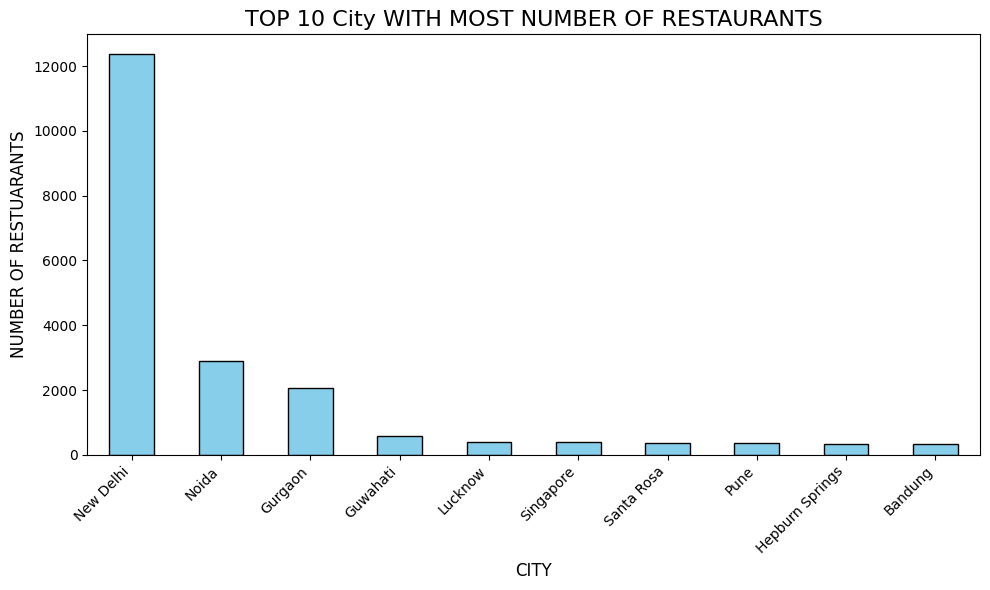

In [5]:
# now we are going to make some visualization before doing encoding techniques
# now we are going to make barcharts for city columns to identify top 10 cities which has high number of  restaurants.
import matplotlib.pyplot as plt
city=df['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
city.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title("TOP 10 City WITH MOST NUMBER OF RESTAURANTS",fontsize=16)
plt.xlabel('CITY',fontsize=12)
plt.ylabel('NUMBER OF RESTUARANTS',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

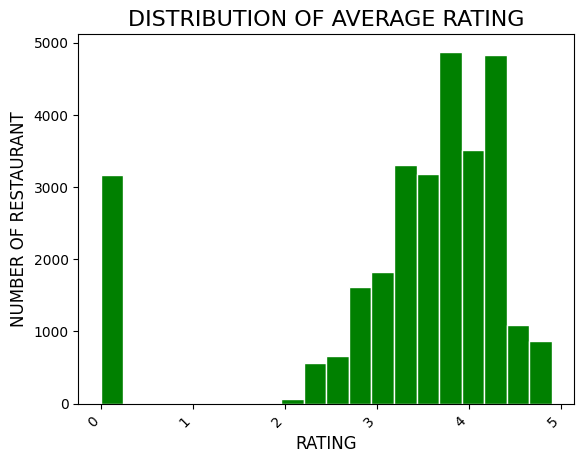

In [6]:
# now we are going to see the distribution of the average rating
plt.Figure(figsize=(10,6))
df['Rating'].hist(bins=20,color='green',edgecolor='white')
plt.grid(False)
plt.title("DISTRIBUTION OF AVERAGE RATING",fontsize=16)
plt.xlabel("RATING",fontsize=12)
plt.ylabel('NUMBER OF RESTAURANT',fontsize=12)
plt.xticks(rotation=45,ha='right')




plt.show()

In [11]:
import seaborn as sns

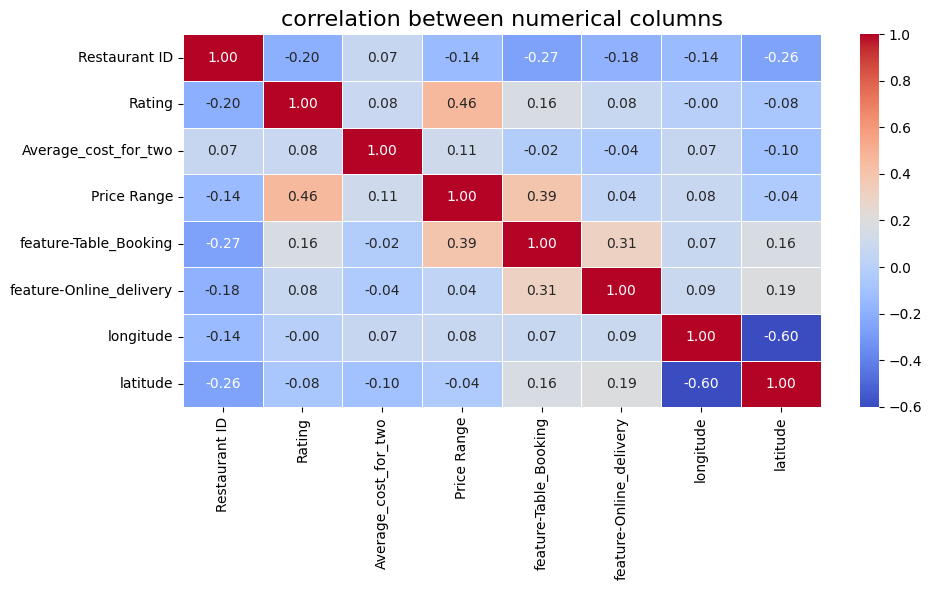

In [12]:
numerical_columns=df.select_dtypes(include=['number'])
correlation_matrix=numerical_columns.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("correlation between numerical columns",fontsize=16)
plt.tight_layout()
plt.show()